In [1]:
"""
AIT 526: Intro to NLP - Lab 1
Group 4 - Rebecca Conn, Delena Bell, Viruthika Vallanadu, Adham Miskinyar
"""

import nltk
nltk.download('punkt')

# 1.1 Load one text file.
fo = open("Harry Potter Book1.txt", "r", encoding='utf-8')
mytext = fo.read()

C:\Users\rebec\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# 1.2 Tokenize sentences and words. 
#     Print lens of sentences and tokens and only print the first 20 words.
sentence = nltk.sent_tokenize(mytext)
print("\n# of sentences: ", len(sentence))
word = nltk.word_tokenize(mytext)
print("# of words after word tokenizing: ", len(word))
print(word[:20])


# of sentences:  6394
# of words after word tokenizing:  98782
['Harry', 'Potter', 'and', 'the', 'Sorcerer', "'s", 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr.', 'and', 'Mrs.', 'Dursley', ',', 'of', 'number']


In [3]:
# 1.3 Remove punctuations. Only print the first 20 words.
#need to Import Regular Expression Tokenizer to remove punctuations
from nltk.tokenize import RegexpTokenizer

nopunc = RegexpTokenizer(r'\w+').tokenize(mytext)
print("\n# of words after punctuation removing: ", len(nopunc))
print(nopunc[:20])


# of words after punctuation removing:  80669
['Harry', 'Potter', 'and', 'the', 'Sorcerer', 's', 'Stone', 'CHAPTER', 'ONE', 'THE', 'BOY', 'WHO', 'LIVED', 'Mr', 'and', 'Mrs', 'Dursley', 'of', 'number', 'four']


In [4]:
# 1.4 Remove stop words and count the distinct cleaned words.
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.probability import FreqDist

nostop = [i.lower() for i in nopunc if i.lower() not in stopwords.words('english')]
print("\n# of words without stop words: ", len(nostop))
print(nostop[:20])
print(nltk.FreqDist(nostop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



# of words without stop words:  40808
['harry', 'potter', 'sorcerer', 'stone', 'chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank']
<FreqDist with 5630 samples and 40808 outcomes>


In [5]:
# 1.5 Lemmatize the cleaned words and count the distinct lemmatized words. 
#     What’s different from 1.4? Please clearly explain.
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
lemm_out = [lemm.lemmatize(w) for w in nostop]
print("\n", nltk.FreqDist(lemm_out))


# Explaintation
#Lemmatization is the process of grouping together the different inflected 
#forms of a word to be analyzed as a single item. Lemmatization brings 
#context to the words; it links words with similar meanings to one word. '''

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rebec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



 <FreqDist with 5111 samples and 40808 outcomes>


[('harry', 1327), ('said', 794), ('ron', 429), ('hagrid', 370), ('hermione', 270), ('one', 269), ('back', 264), ('know', 233), ('get', 203), ('got', 199), ('could', 198), ('like', 195), ('see', 181), ('professor', 181), ('snape', 172)]


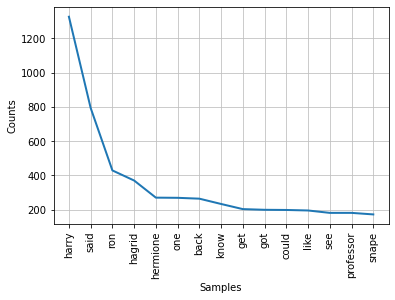

In [6]:
# 1.6 Calculate the word distribution and plot and list only top 15 words.
nostop_nf = nltk.FreqDist(nostop)
lemm_nf = nltk.FreqDist(lemm_out)
print(lemm_nf.most_common(15))
import matplotlib.pyplot as plt
lemm_nf.plot(15, cumulative=False)
plt.show()

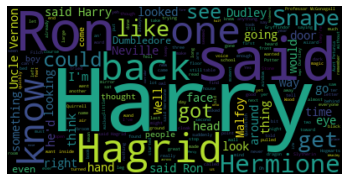

In [7]:
# 2.1 Follow the wordcloud simple example to generate the word cloud without
#     stopwords directly from the original text and show it.
from wordcloud import WordCloud 
#STOPWORDS
STOPWORDS = stopwords.words('english')

wordcloud = WordCloud(stopwords=STOPWORDS).generate(mytext)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

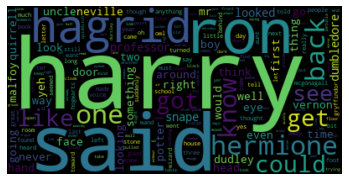

In [8]:
# 2.2 Generate the word cloud for the processed data in Task 1 and show the image.

from wordcloud import WordCloud
fdist = FreqDist(lemm_out)

wordcloud = WordCloud().generate_from_frequencies(fdist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [9]:
# 2.3 Compare the above two word clouds and what difference do you find? 
#     Please clearly explain why.

#In 2.1, we created a word cloud of the text without stop words 
#while in 2.2 our word cloud uses the tokenized/lemmaized text 
#we created in part 1. By doing this, the 2.2 word cloud only includes 
#unigrams of text as seen in the split of 'Uncle' and 'Vernon' 
#(near the S and A in said)
#where 2.1 includes both unigrams and bigrams 
#(see 'Unlce Vernon' horizontally near the H in Harry)

In [10]:
# 3.1 Based on your experience with these NLP tasks, please compare with text 
#     data processing and numeric data processing.

#  Text and numeric data processing use similar steps/idealialogies. 
#    Both need to be cleaned, removing unneccesary components as they are 
#    prepped for analysis.
#    Text processing needs to additionally take grammar and linguistic rules 
#    into account but during analysis, 
#    text is actually converted into numerica data.
#    While there are obvious differences between the two processes, 
#    both are extremely important in the word of Big Data and Data Analytics 
#    and are treated similarly in processing techniques such as 
#    models and alogorthims